<p><a name="sections"></a></p>


# Data Exploration
</a><br>
- <a href="#import">Import Data</a><br>
- <a href="#1">Warmup Question 1 </a><br>
- <a href="#2">Warmup Question 2</a><br>
- <a href="#eda">EDA</a><br>
</a><br>

### Links:
- **Comprehensive data exploration with Python** https://www.kaggle.com/wordsforthewise/eda-with-python
- **Dataset 2007-2015 with more kernels** https://www.kaggle.com/wendykan/lending-club-loan-data
- **Google Docs for team** https://docs.google.com/document/d/1vutUT82n14cegW-OhpKH4A2d2qsPeS14ZJvxSPeK-rI/edit?usp=sharing


In [3]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

import seaborn as sns
sns.set(style="whitegrid")
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib as matplotlib
%matplotlib inline

# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression 
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 

from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

<p><a name="import"></a></p>

## Import Data 

In [6]:
# Importing data 

df_raw_accepted = pd.read_csv('accepted_2007_to_2018Q4.csv')
df_raw_rejected = pd.read_csv('rejected_2007_to_2018Q4.csv')

# df_raw_test = pd.read_csv('test.csv',index_col=0)
# df_raw = pd.concat([df_raw, df_raw_test], sort = False) 

In [ ]:
df_raw_accepted.shape

In [ ]:
df_raw_rejected.shape

In [ ]:
# 2007 - 2016 Approval Rate
1321847/11079386 

In [1]:
# 2007 - 2018 Approval Rate
2260701/(2260701+27648741)

0.07558486045978391

In [7]:
#may want to sample according ratio  
#smote unbalance  

df_raw_accepted.sample(frac=0.001).to_csv('sample_accepted.csv')
df_raw_rejected.sample(frac=0.001).to_csv('sample_rejected.csv')

In [4]:
sample_accepted = pd.read_csv('sample_accepted.csv')
sample_rejected = pd.read_csv('sample_rejected.csv')

In [ ]:
sample_accepted.describe()

In [ ]:
print(df_raw_accepted.columns)
print(df_raw_rejected.columns)

In [ ]:
print(df_raw_accepted.dtypes)
print(df_raw_rejected.dtypes)

<p><a name="1"></a></p>

 ### Question 1
- **How are the loan amounts/funded amounts distributed?** 
-loan amounts is the listed amount of the loan applied for by the borrower. Funded amounts is the total amount committed to that loan at that point in time. 4 out of 2000 samples, funded amounts is less than loan amount, the others are the same. Funded amounts distribution is right skewed, mean $14,233
- **Are there variations across different loan purposes, loan grades, etc?**
- **Are loans with higher funded amounts harder to be paid-in-full?**


In [ ]:
sample_accepted.describe()

In [ ]:
plt.hist(sample_accepted['loan_amnt'],bins=10)

In [ ]:
sns.distplot(sample_accepted['loan_amnt'],bins=10)

In [ ]:
plt.hist(sample_accepted['funded_amnt'])

In [ ]:
sample_accepted[sample_accepted['funded_amnt']!=sample_accepted['loan_amnt']]

In [ ]:
plotlist = ['term','grade','emp_length',
            #'purpose',
            'verification_status']

for column in plotlist:
    g = sns.FacetGrid(sample_accepted, col=column, hue=column, palette='Set1', size=10)
    g.map(sns.distplot, 'funded_amnt')

In [ ]:
sns.catplot(x="verification_status", y="funded_amnt", hue="grade", kind="bar", data=sample_accepted)

In [ ]:
sns.catplot(x="grade", y="funded_amnt", hue="term", kind="bar", data=sample_accepted)

In [ ]:
sns.catplot(x="grade", y="funded_amnt", hue="term", kind="bar", data=sample_accepted)

In [ ]:
sns.catplot(x="purpose", y="funded_amnt", kind="bar", data=sample_accepted, size=15)

In [ ]:
sns.catplot(x="grade", y="funded_amnt", hue="home_ownership", kind="bar", data=sample_accepted) 

In [ ]:
sample_accepted.loan_status.unique()

In [ ]:
large_amount = sample_accepted[sample_accepted.funded_amnt>15000]
small_amount = sample_accepted[sample_accepted.funded_amnt<15000]

In [ ]:
large_amount.shape

In [ ]:
large_amount[sample_accepted.loan_status == 'Fully Paid'].shape 

In [ ]:
204/743

In [ ]:
small_amount.shape

In [ ]:
small_amount[sample_accepted.loan_status == 'Fully Paid'].shape

In [ ]:
379/2261

In [ ]:
sns.countplot(x="term", hue=loan_status, data=large_amount)

In [ ]:
sns.catplot(x="loan_status", y="funded_amnt", kind="bar", data=sample_accepted, size = 20) 

<p><a name="2"></a></p>

### Question 2:
- For investors, the profitability of the loans is of their central 
concern. For a given loan, the profit-and-loss (in percentages) can be computed as
the (total_payment - principal)/principal.
- For those loans which are eventually 'Fully Paid', what are the average
returns (or the distributions of returns) of different loan grades/terms?
- For those loans wich are default or beyond, what are the average returns or return distributions?
- What about all the loans which have been 
terminated ('fully paid', 'default', 'charged off')?
- What about the loans which end up in **loan settlement negotiations**?
- Any variation of patterns for different loan purposes?
- What happens if the issuance years are included in your analysis?
- Is there any pattern between loan duration vs return rate?

In [ ]:
sample_accepted['loan_status'].unique()

In [ ]:
fully_paid = sample_return[sample_accepted['loan_status']=='Fully Paid']

In [ ]:
fully_paid.groupby('grade').aggregate({'return':'mean'})

In [ ]:
fully_paid.groupby('term').aggregate({'return':'mean'})

In [ ]:
fully_paid.groupby('sub_grade').aggregate({'return':'mean'})

In [ ]:
sample_return = sample_accepted.copy()
sample_return['return'] = sample_return['total_pymnt']/sample_return['total_rec_prncp'] - 1 

In [ ]:
charged_off = sample_return[sample_accepted['loan_status']=='Charged Off']

In [ ]:
charged_off.groupby('grade').aggregate({'return':'mean'})

In [ ]:
charged_off.groupby('term').aggregate({'return':'mean'})

In [ ]:
sample_return.groupby('loan_status').agg

In [ ]:
sample_accepted[sample_accepted.loan_status == 'Charged Off']

In [ ]:
sample_accepted[sample_accepted.loan_status == 'Default']

In [ ]:
df_raw_accepted[df_raw_accepted.loan_status == 'Default']

In [ ]:
1615/1321847

In [ ]:
accepted = df_raw_accepted[df_raw_accepted.loan_status == 'Fully Paid']

In [ ]:
accepted['return'] = accepted['total_pymnt']/accepted['total_rec_prncp'] - 1 

In [ ]:
accepted['return'].mean()

In [ ]:
plt.hist(accepted['return'],bins=20)

In [ ]:
# sample_accepted = sample_accepted[sample_accepted.loan_status == 'Fully Paid']
# sample_accepted['return'] = sample_accepted['total_pymnt']/sample_accepted['total_rec_prncp'] - 1 
# sample_accepted['return'].mean()

In [ ]:
plt.hist(sample_accepted['return'],bins=20)

 <p><a name="eda"></a></p>

## EDA

In [10]:
def data_process(df_accepted,df_rejected):
    
    accepted = df_accepted.copy()
    rejected = df_rejected.copy()

    
    # Processing accepted data 
    accepted = accepted[['loan_amnt', 'purpose', 'dti',
       'zip_code', 'addr_state', 'emp_length', 'issue_d',
       'loan_status', 'last_fico_range_high','last_fico_range_low']]
    
    accepted['issue_d'] = pd.to_datetime(accepted['issue_d'])
    accepted['app_year'] = accepted['issue_d'].dt.year
    accepted['app_month'] = accepted['issue_d'].dt.month

    accepted['risk_score'] = (accepted['last_fico_range_high'] + accepted['last_fico_range_low'])/2
    accepted = accepted.drop(columns = ['issue_d','last_fico_range_high','last_fico_range_low'])

#     if reverse = False:
#         accepted = accepted.replace({'loan_status' : { 'Charged Off' : 'rejected', 'Late (16-30 days)' : 'rejected', 
#                                        'Late (31-120 days)' : 'rejected',
#                                        'Does not meet the credit policy. Status:Charged Off' : 'rejected',
#                                        'Fully Paid' : 'accepted', 'Current' : 'accepted',
#                                        'In Grace Period' : 'accepted',
#                                        'Does not meet the credit policy. Status:Fully Paid' : 'accepted'}})

    accepted['accept_status'] =1
            
    
    # Processing rejected data 
    rejected = rejected.iloc[:,1:9]
    rejected = rejected.rename(columns={"Amount Requested": "loan_amnt", "Application Date": "app_date", "Loan Title": "purpose",
                             "Risk_Score": "risk_score", "Debt-To-Income Ratio": "dti", "Zip Code": "zip_code",
                             "State": "addr_state", "Employment Length": "emp_length"})
    rejected['accept_status'] = 0


    rejected['app_date'] = pd.to_datetime(rejected['app_date'])
    rejected['app_year'] = rejected['app_date'].dt.year
    rejected['app_month'] = rejected['app_date'].dt.month

    rejected = rejected.drop(columns = 'app_date')
    
    rejected['dti'] = rejected['dti'].str.replace('%','')
    
    # Merge accepted and rejected data for later process
    df_processed = pd.concat([accepted, rejected], sort=True)
    

    # Convert categorical to numerical-- 10 means more than 10 years 
    df_processed['emp_length'] = df_processed['emp_length'].str.extract('(\d+)')


    # Missing Values: risk_score, emp_length, dti
    df_processed['emp_length'] = df_processed['emp_length'].fillna(0)
    df_processed['emp_length'] = df_processed['emp_length'].astype(int)
    df_processed['risk_score'] = df_processed['risk_score'].fillna(0)
    df_processed['dti'] = df_processed['dti'].fillna(0)
    df_processed['dti'] = df_processed['dti'].astype(float)
    
#     df_processed = pd.get_dummies(df_processed)
    
    return df_processed

In [ ]:
df_processed = data_process(sample_accepted,sample_rejected)

In [6]:
def getDistribution(df, primary_key, secondary_key):
    cnt = df[primary_key].value_counts()
    print('Count by primary key: ', primary_key)
    print(cnt)
    print('------------------------------------')
    df_count1 = pd.DataFrame(df.groupby([primary_key, secondary_key]).count().iloc[:, 0])
    print('Count by {} (primary key) and {} (secondary key)'.format(primary_key, secondary_key))
    print(df_count1)
    print('------------------------------------')
    df_cnt_unstk_resetIdx = df_count1.unstack().reset_index()
    for val in sorted(df[primary_key].unique()):
        df_cnt_unstk_resetIdx[df_cnt_unstk_resetIdx[primary_key] == val].plot.bar(title = val)

In [7]:
def getDistribution_numeric(df, primary_key, secondary_key):
    cnt = df[primary_key].unique()
    print('Count by primary key: ', primary_key)
    print(cnt)
    print('------------------------------------')
    df_count1 = pd.DataFrame(df.groupby([primary_key, secondary_key]).count().iloc[:, 0])
    print('Count by {} (primary key) and {} (secondary key)'.format(primary_key, secondary_key))
    print(df_count1)
    print('------------------------------------')   
    for val in sorted(df[primary_key].unique()):
        temp = df[df[primary_key] == val][[secondary_key]]
        plt.figure(figsize = (10, 8))
        _ = plt.hist(temp[secondary_key], bins = 20)
        plt.title(val, fontdict=None, loc='center')   

In [35]:
df = df_processed.groupby(['app_year', 'accept_status']).size().reset_index(name='counts')

In [ ]:
years = df.app_year.unique().tolist()
y1 = df[df.accept_status==0].counts.tolist()
y2 = df[df.accept_status==1].counts.tolist()

fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=y1,
                name='Rejected',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=years,
                y=[0, 1, 4, 14, 30, 60, 136, 205, 439, 438, 458, 476],
                name='Accepted',
                marker_color='rgb(26, 118, 255)'
                ))

fig.update_layout(
    title='2007 - 2018 Accepted and Rejected Loans',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Loans:thousand',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

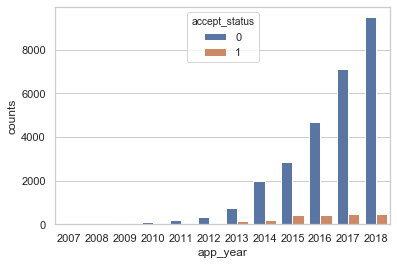

In [63]:
sns.barplot(data=df, x='app_year',y='counts',hue='accept_status')

In [52]:
df2 = df_processed[df_processed.accept_status==1].groupby(['app_year', 'loan_status']).size().reset_index(name='counts')

In [58]:
sns.barplot?

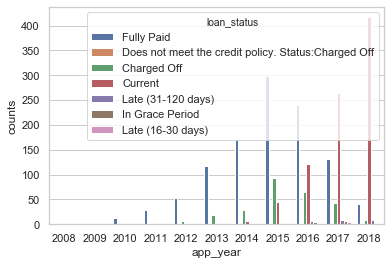

In [66]:
sns.barplot(data=df2, x='app_year',y='counts',hue='loan_status')

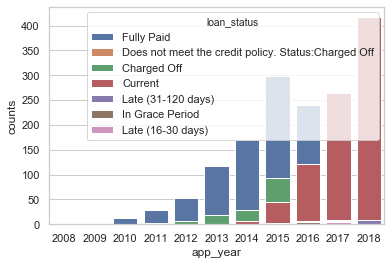

In [68]:
sns.barplot(data=df2, x='app_year',y='counts',hue='loan_status',dodge=False)

In [71]:
df3 = df_processed.groupby(['app_year', 'addr_state']).size().reset_index(name='counts')

In [ ]:
sns.barplot(data=df3, x='app_year',y='counts',hue='addr_state',dodge=False)

In [91]:
df4 = df_processed.groupby(['app_year','accept_status']).agg({'dti': 'median'}).reset_index()

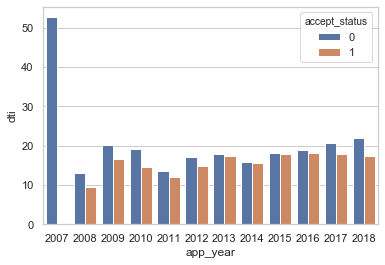

In [93]:
sns.barplot(data=df4, x='app_year',y='dti',hue='accept_status')

In [142]:
df5 = df_processed.groupby(['app_year','accept_status']).agg({'emp_length': 'median'}).reset_index()
df5

,app_year,accept_status,emp_length
0,2007,0,1.0
1,2008,0,2.0
2,2008,1,1.0
3,2009,0,2.0
4,2009,1,2.5
5,2010,0,1.0
6,2010,1,3.0
7,2011,0,1.0
8,2011,1,5.0
9,2012,0,1.0


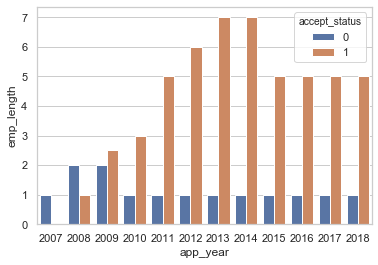

In [96]:
sns.barplot(data=df5, x='app_year',y='emp_length',hue='accept_status')

In [101]:
df6 = df_processed.groupby(['app_year','accept_status']).agg({'loan_amnt': 'mean'}).reset_index()

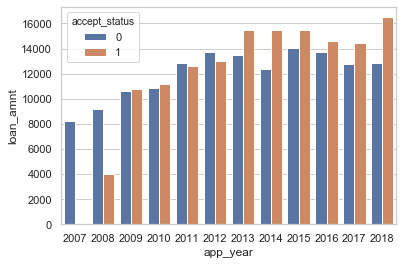

In [102]:
sns.barplot(data=df6, x='app_year',y='loan_amnt',hue='accept_status')

In [105]:
df6 = df_processed.groupby(['app_year','accept_status']).agg({'risk_score': 'mean'}).reset_index()

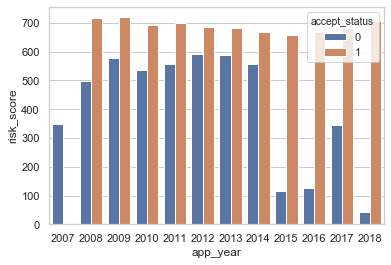

In [106]:
sns.barplot(data=df6, x='app_year',y='risk_score',hue='accept_status')

In [114]:
df7 = df_processed.groupby(['app_year', 'accept_status','purpose']).size().reset_index(name='counts')

In [ ]:
sns.barplot(data=df7, x='app_year',y='counts',hue='purpose')

In [119]:
accepted = sample_accepted[['loan_amnt', 'purpose', 'dti',
   'zip_code', 'addr_state', 'emp_length', 'issue_d',
   'loan_status', 'last_fico_range_high','last_fico_range_low']]

accepted['issue_d'] = pd.to_datetime(accepted['issue_d'])
accepted['app_year'] = accepted['issue_d'].dt.year
accepted['app_month'] = accepted['issue_d'].dt.month

accepted['risk_score'] = (accepted['last_fico_range_high'] + accepted['last_fico_range_low'])/2
accepted = accepted.drop(columns = ['issue_d','last_fico_range_high','last_fico_range_low'])

In [139]:
df8 = accepted.groupby(['app_year','loan_status']).size().reset_index(name='counts')

In [ ]:
df8

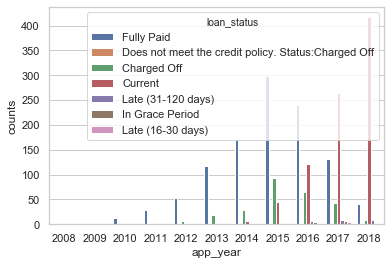

In [126]:
sns.barplot(data=df8, x='app_year',y='counts',hue='loan_status')

In [ ]:
df = df_processed
primary_key = 'app_year'
secondary_key = 'loan_status'
getDistribution(df, primary_key, secondary_key)

In [ ]:
df = sample_accepted
primary_key = 'purpose'
secondary_key = 'grade'
getDistribution(df, primary_key, secondary_key)

Count by primary key:  purpose
['house' 'credit_card' 'major_purchase' 'debt_consolidation' 'other'
 'moving' 'small_business' 'home_improvement' 'vacation' 'medical'
 'renewable_energy' 'car' 'wedding']
------------------------------------
Count by purpose (primary key) and loan_amnt (secondary key)
                    Unnamed: 0
purpose  loan_amnt            
car      3000.0              2
         4200.0              1
         4500.0              2
         4800.0              1
         5000.0              1
...                        ...
vacation 10500.0             1
         19200.0             1
wedding  4000.0              1
         5000.0              1
         25000.0             1

[650 rows x 1 columns]
------------------------------------


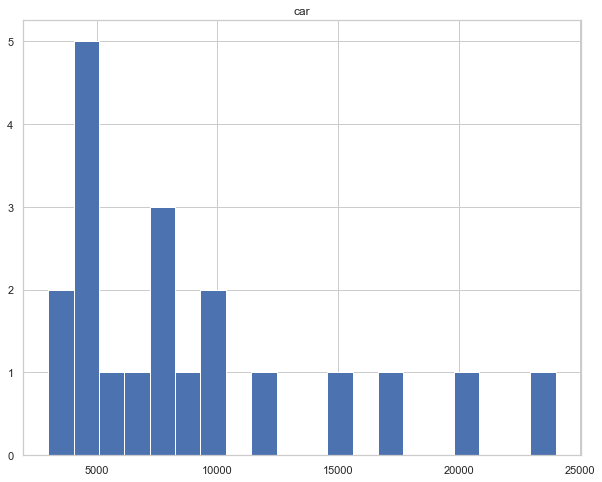

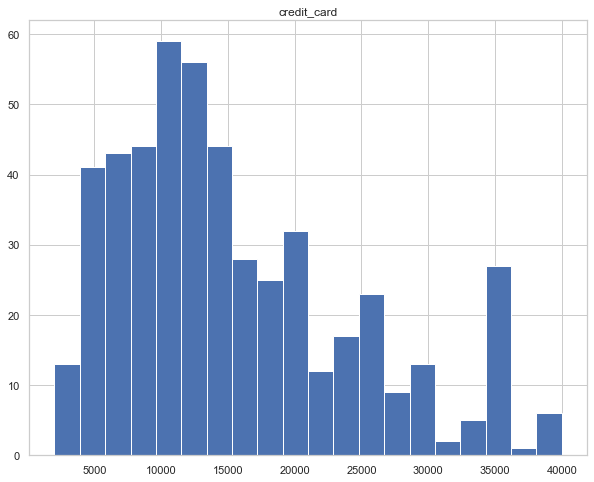

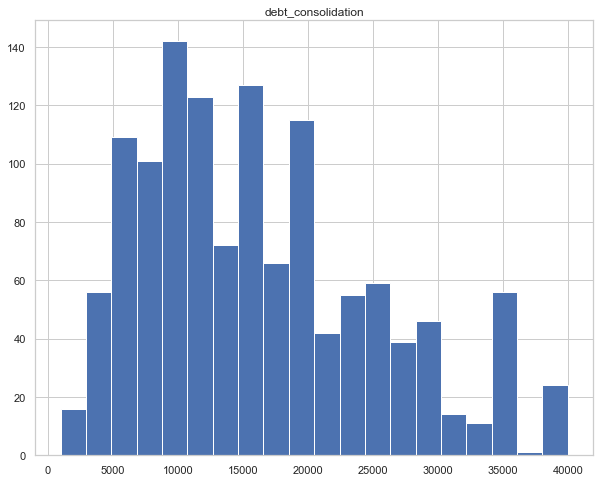

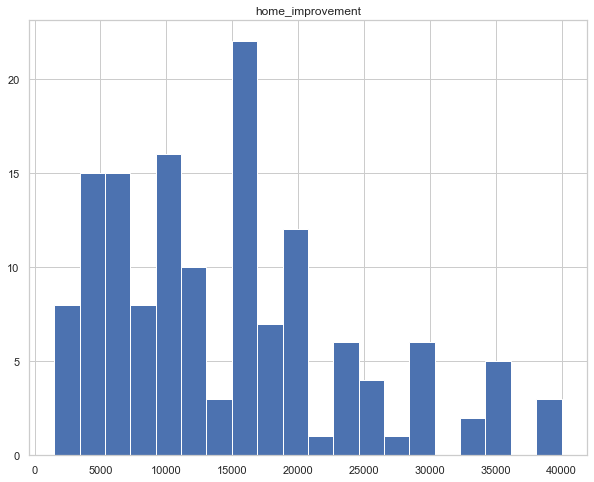

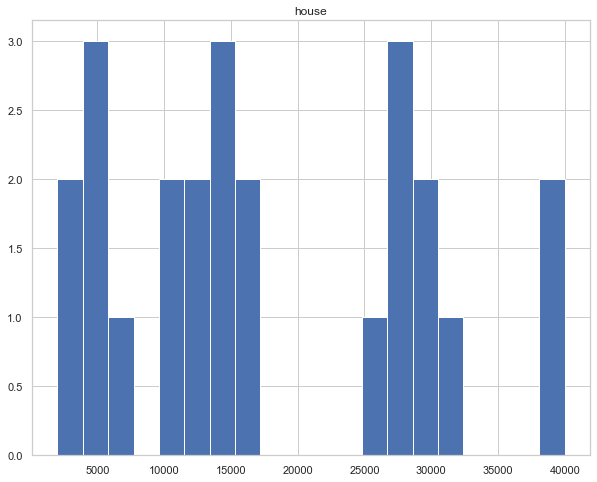

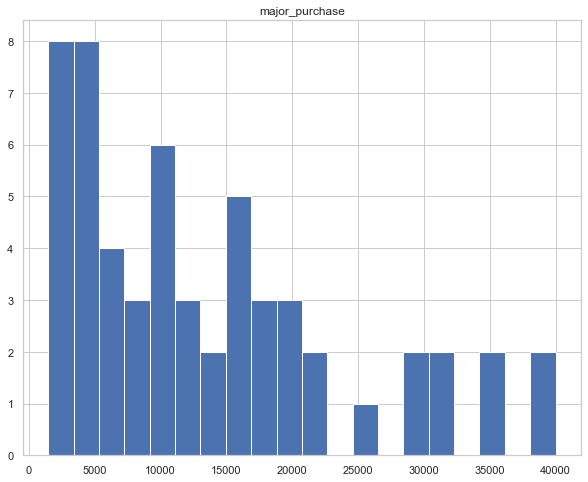

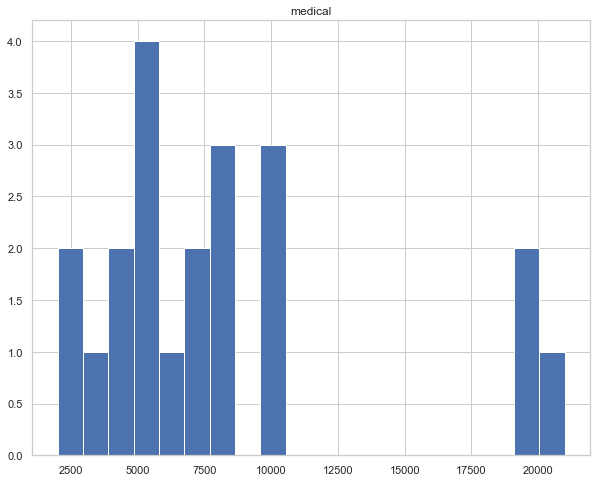

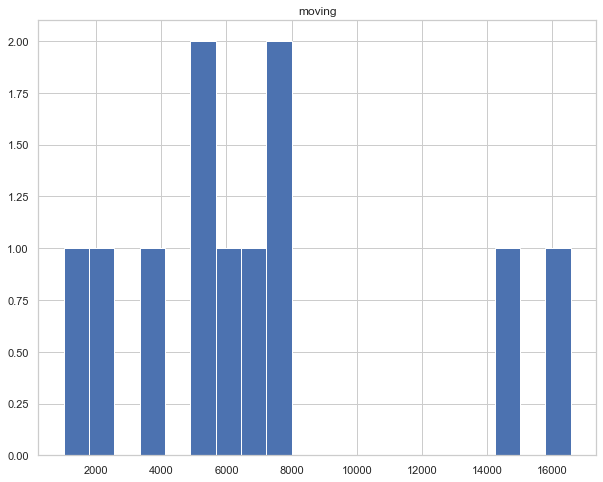

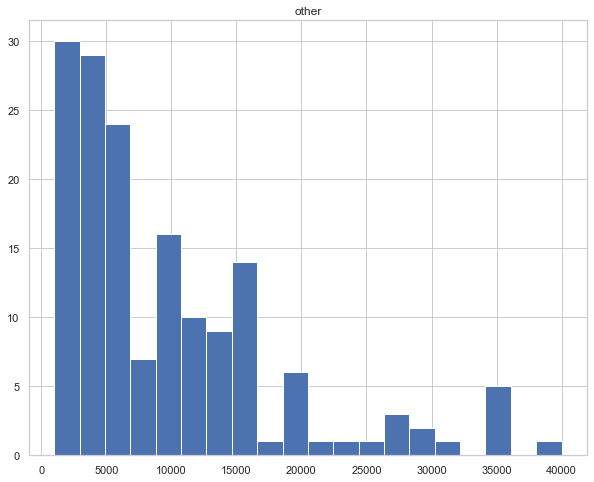

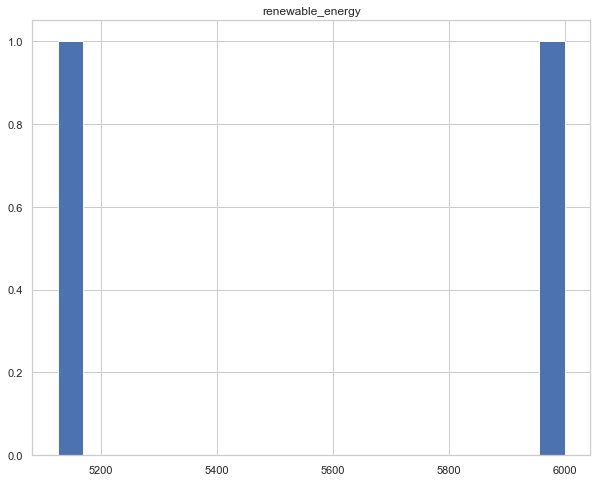

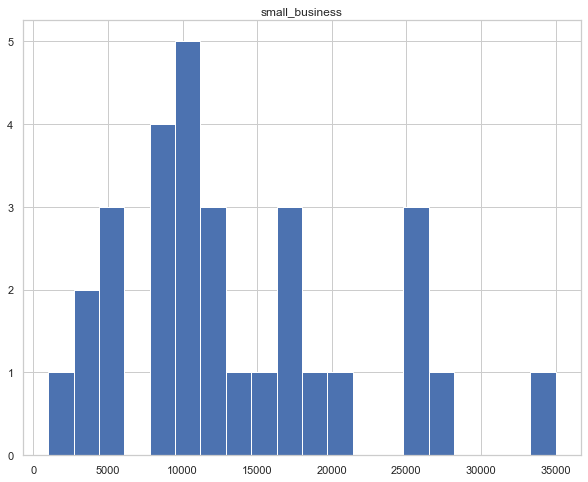

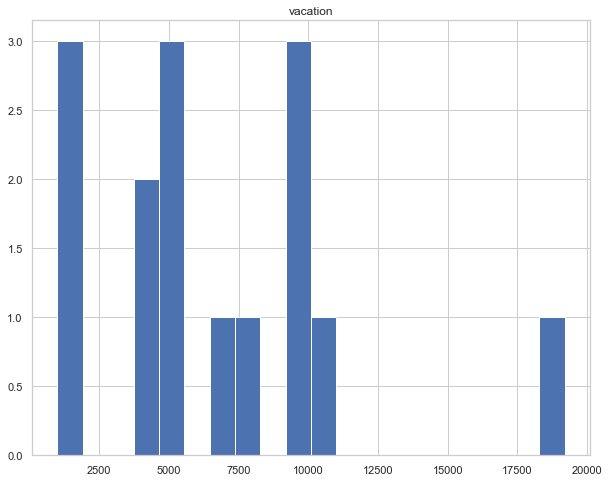

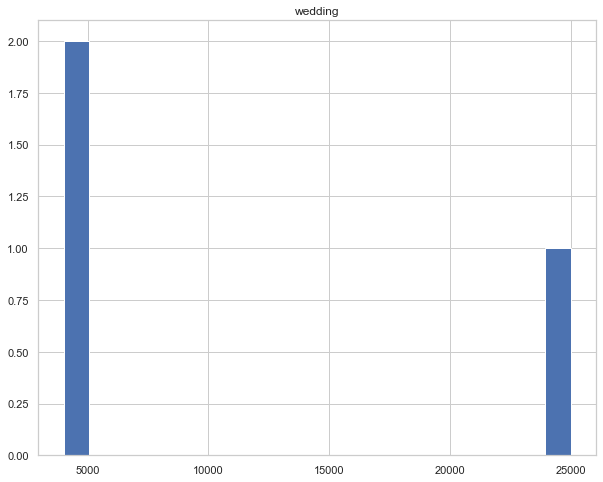

In [8]:
df = sample_accepted
primary_key = 'purpose'
secondary_key = 'loan_amnt'
getDistribution_numeric(df, primary_key, secondary_key)

In [ ]:
## moving average for fico score 

import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
plt.style.use('ggplot')

# Input variables
start = datetime.datetime(2016, 1, 01)
end = datetime.datetime(2018, 3, 29)
stock = 'WFC'

# Extrating data
df = web.DataReader(stock,'morningstar', start, end)
df = df['Close']

print df 

plt.plot(df['WFC'],label= 'Close')
plt.plot(df['WFC'].rolling(9).mean(),label= 'MA 9 days')
plt.plot(df['WFC'].rolling(21).mean(),label= 'MA 21 days')
plt.legend(loc='best')
plt.title('Wells Fargo\nClose and Moving Averages')
plt.show()